In [1]:
import pandas as pd
from datetime import datetime
import sqlite3
import numpy as np

import matplotlib.pyplot as plt

In [2]:
!ls

Images                          README.md
Marshall's Notebook.ipynb       zippedData
Microsoft Studio Analysis.ipynb


Read in HBO_Max_Content.csv

In [34]:
HBO_max_content = pd.read_csv('./zippedData/HBO_MAX_Content.csv')

## Explore the data

In [4]:
HBO_max_content.head()

,title,type,year,rating,imdb_score,rotten_score,decade,imdb_bucket,genres_Action_Adventure,genres_Animation,...,platforms_shudder,platforms_starz,platforms_sundancenow,platforms_syfy_tveverywhere,platforms_tbs,platforms_tnt,platforms_trutv_tveverywhere,platforms_urbanmoviechannel,platforms_velocity_go,platforms_watch_tcm
0,Game of Thrones,TV,2011,R/TV-MA,9.3,89.0,2010-2019,9.01-9.50,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Rick and Morty,TV,2013,R/TV-MA,9.2,94.0,2010-2019,9.01-9.50,1,1,...,0,0,0,0,0,0,0,0,0,0
2,The Lord of the Rings: The Fellowship of the Ring,NaN,2001,PG-13/TV-14,8.8,91.0,2000-2009,8.51-9.00,1,0,...,0,0,0,0,0,0,0,0,0,0
3,Fight Club,NaN,1999,R/TV-MA,8.8,79.0,1990-1999,8.51-9.00,0,0,...,0,0,0,0,0,0,0,0,0,0
4,The Lord of the Rings: The Two Towers,NaN,2002,PG-13/TV-14,8.7,95.0,2000-2009,8.51-9.00,1,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
HBO_max_content.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2087 entries, 0 to 2086
Data columns (total 75 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   title                                 2087 non-null   object 
 1   type                                  375 non-null    object 
 2   year                                  2087 non-null   int64  
 3   rating                                1537 non-null   object 
 4   imdb_score                            2025 non-null   float64
 5   rotten_score                          1365 non-null   float64
 6   decade                                2087 non-null   object 
 7   imdb_bucket                           2025 non-null   object 
 8   genres_Action_Adventure               2087 non-null   int64  
 9   genres_Animation                      2087 non-null   int64  
 10  genres_Anime                          2087 non-null   int64  
 11  genres_Biography 

In [6]:
HBO_max_content.duplicated().sum() #check for duplicated records

12

In [7]:
HBO_max_content.drop_duplicates(keep='first',inplace=True) #remove duplicated records but keep first

In [8]:
HBO_max_content.duplicated().sum() #sanity check

0

We need to look at the NaN entries in "type"

In [9]:
HBO_max_content['type'].value_counts()

TV    373
Name: type, dtype: int64

Since we can see from the head movies have a NaN value in the 'type' column and no other categories are present we can fill the NaN entries as Movies/Other.



In [10]:
HBO_max_content['type'] = HBO_max_content["type"].fillna('Movies/Other') #fill NaN with Movies/Other

In [11]:
HBO_counts = HBO_max_content['type'].value_counts(normalize=True).tolist()
HBO_counts

[0.8202409638554217, 0.1797590361445783]

## Performance metric

Now we. need to look at the performace metric in the data. We have both Rotten Tomato scores and IMDB scores.
Are they correlated?

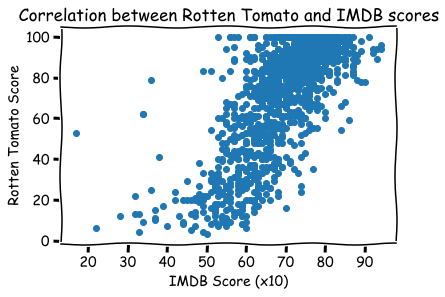

In [12]:
with plt.xkcd():
    fig, ax = plt.subplots()

    X = HBO_max_content['imdb_score']*10 # *10 used to scale score to be the same as rotten score
    y = HBO_max_content['rotten_score']
    ax.scatter(X, y)
    ax.set_title('Correlation between Rotten Tomato and IMDB scores')
    ax.set_xlabel('IMDB Score (x10)')  
    ax.set_ylabel('Rotten Tomato Score')
    ax.annotate('minimum!', xy=(0, 0), xytext=(1, -4),
                arrowprops={'facecolor': 'black'})

Looks like these score have a descent positive correlation. Maybe one will have a higher resolution. Let's check.

In [13]:
Top_10_imdb = HBO_max_content.sort_values(by= ['imdb_score'],ascending=False).head(10)

In [14]:
Top_10_imdb['imdb_score']

1592    9.9
1669    9.8
8       9.4
23      9.4
0       9.3
16      9.3
1       9.2
30      9.2
1100    9.2
1677    9.2
Name: imdb_score, dtype: float64

In [15]:
Top_10_rt = HBO_max_content.sort_values(by= ['rotten_score'],ascending=False).head(10)

In [16]:
Top_10_rt['rotten_score']

864    100.0
286    100.0
901    100.0
877    100.0
874    100.0
873    100.0
258    100.0
870    100.0
262    100.0
869    100.0
Name: rotten_score, dtype: float64

Looking the the two scoring columns. We have seen that these score are positively correlated but the rotten tomato scores have hundreds more null values and lack resolution for the top scores which we will be using in our analaysis. Moving forward we will use IMDB scores as our preformace metric.

In [17]:
#Create df of top 100 IMDB scores

In [18]:
Top_100_HBO = HBO_max_content.sort_values(by= ['imdb_score'],ascending=False).head(100) 

In [19]:
top_100_counts = Top_100_HBO['type'].value_counts().tolist() # collect counts by type

In [20]:
Top_100_HBO.head(10)

,title,type,year,rating,imdb_score,rotten_score,decade,imdb_bucket,genres_Action_Adventure,genres_Animation,...,platforms_shudder,platforms_starz,platforms_sundancenow,platforms_syfy_tveverywhere,platforms_tbs,platforms_tnt,platforms_trutv_tveverywhere,platforms_urbanmoviechannel,platforms_velocity_go,platforms_watch_tcm
1592,El Astronauta,Movies/Other,2018,PG/TV-PG,9.9,NaN,2010-2019,9.51-10,0,0,...,0,0,0,0,0,0,0,0,0,0
1669,Wonder,Movies/Other,2019,NaN,9.8,NaN,2010-2019,9.51-10,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Chernobyl,TV,2019,R/TV-MA,9.4,96.0,2010-2019,9.01-9.50,0,0,...,0,0,0,0,0,0,0,0,0,0
23,Band of Brothers,TV,2001,R/TV-MA,9.4,94.0,2000-2009,9.01-9.50,1,0,...,0,0,0,0,0,0,0,0,0,0
0,Game of Thrones,TV,2011,R/TV-MA,9.3,89.0,2010-2019,9.01-9.50,1,0,...,0,0,0,0,0,0,0,0,0,0
16,The Wire,TV,2002,R/TV-MA,9.3,94.0,2000-2009,9.01-9.50,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Rick and Morty,TV,2013,R/TV-MA,9.2,94.0,2010-2019,9.01-9.50,1,1,...,0,0,0,0,0,0,0,0,0,0
30,The Sopranos,TV,1999,R/TV-MA,9.2,92.0,1990-1999,9.01-9.50,0,0,...,0,0,0,0,0,0,0,0,0,0
1100,The World Between Us,TV,2019,NaN,9.2,NaN,2010-2019,9.01-9.50,0,0,...,0,0,0,0,0,0,0,0,0,0
1677,Wednesday,Movies/Other,2020,NaN,9.2,NaN,2020-2029,9.01-9.50,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# Load Netflix data

In [22]:
Netflix_data = pd.read_csv('./zippedData/netflix_titles.csv')

In [23]:
Netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [24]:
Netflix_data.duplicated().sum() # check for duplicates

0

In [25]:
Netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [26]:
Netflix_counts = Netflix_data['type'].value_counts(normalize=True).tolist() # get values counts by type

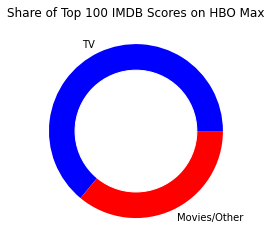

In [27]:
# library
import matplotlib.pyplot as plt

# create data
top_100_counts = Top_100_HBO['type'].value_counts().tolist()
names = ['TV','Movies/Other']
color=['b','r']
# Create a pieplot
plt.pie(top_100_counts,labels=names,colors=color)
plt.title("Share of Top 100 IMDB Scores on HBO Max")
# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.savefig('./Images/Marshall_pie_chart.png', bbox_inches='tight')
plt.show()

In [28]:
Netflix_counts = [Netflix_counts[0]*100,Netflix_counts[1]*100]
Netflix_counts

[69.61507891449983, 30.38492108550017]

In [29]:
HBO_counts = [HBO_counts[0]*100,HBO_counts[1]*100]
HBO_counts

[82.02409638554217, 17.97590361445783]

In [30]:
movie_counts=[Netflix_counts[0],HBO_counts[0]]

In [31]:
tv_counts=[Netflix_counts[1],HBO_counts[1]]

No handles with labels found to put in legend.


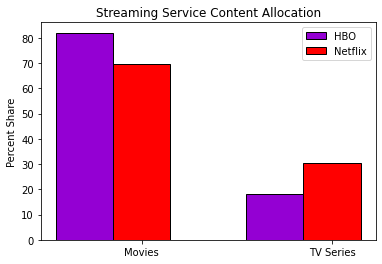

In [32]:
# width of the bars
barWidth = 0.3
 
# Choose the height of the blue bars
bars1 = HBO_counts
 
# Choose the height of the cyan bars
bars2 = Netflix_counts
 


r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Create blue bars
plt.bar(r1, bars1, width = barWidth, color = 'darkviolet', edgecolor = 'black', capsize=7, label='HBO')
 
# Create cyan bars
plt.bar(r2, bars2, width = barWidth, color = 'red', edgecolor = 'black', capsize=7, label='Netflix')
 
# general layout
plt.xticks([r + barWidth for r in range(len(bars1))], ['Movies', 'TV Series'])
plt.ylabel('Percent Share')
plt.legend()

plt.title('Streaming Service Content Allocation')
ax.legend()
plt.savefig('./Images/Marshall_bar_chart.png', bbox_inches='tight')
plt.show() 

